Dataset Preview:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  

Linear Regression Performance
Training Error (MAE): 8.3459
Validation Error (MAE): 8.4107
Training R-squared: 0.9674
Validation R-squared: 0.9656


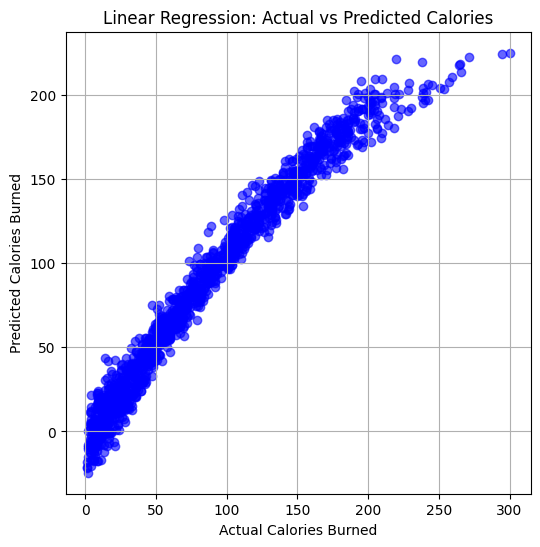

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('calories.csv')

# Preview dataset
print("Dataset Preview:")
print(df.head())

# Encode categorical features (Gender)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Define features and target variable
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    features, target, test_size=0.1, random_state=22
)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on training and validation data
train_preds = lr.predict(X_train)
val_preds = lr.predict(X_val)

# Evaluate model performance
print("\nLinear Regression Performance")
print(f"Training Error (MAE): {mean_absolute_error(y_train, train_preds):.4f}")
print(f"Validation Error (MAE): {mean_absolute_error(y_val, val_preds):.4f}")
print(f"Training R-squared: {r2_score(y_train, train_preds):.4f}")
print(f"Validation R-squared: {r2_score(y_val, val_preds):.4f}")

# Optional: Plot predicted vs actual values
plt.figure(figsize=(6,6))
plt.scatter(y_val, val_preds, color='blue', alpha=0.6)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Linear Regression: Actual vs Predicted Calories")
plt.grid(True)
plt.show()
